In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
	print(os.getcwd())
except:
	pass


 # 檢視與處理 Outliers
 ### 為何會有 outliers, 常見的 outlier 原因
 * 未知值，隨意填補 (約定俗成的代入)，如年齡常見 0,999
 * 可能的錯誤紀錄/手誤/系統性錯誤，如某本書在某筆訂單的銷售量 = 1000 本

In [2]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().magic('matplotlib inline')
plt.style.use('ggplot')

# 設定 data_path
dir_data = './data'


In [3]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
"data shape : {}".format(app_train.shape)


Path of read in data: ./data/application_train.csv


'data shape : (307511, 122)'

In [4]:
# 秀出資料欄位的類型與數量
dtype_df = app_train.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df = dtype_df.groupby("Column Type").aggregate('count').reset_index()


 ## 請參考 HomeCredit_columns_description.csv 的欄位說明，觀察並列出三個你覺得可能有 outlier 的欄位並解釋可能的原因

In [5]:
# 先篩選數值型的欄
dtype_select = [np.dtype('int'), np.dtype('float64')]
numeric_columns = list(app_train.columns[list(app_train.dtypes.isin(dtype_select))])

# 再把只有 2 值 (通常是 0,1) 的欄位去掉
numeric_columns = list(app_train[numeric_columns].columns[list(app_train[numeric_columns].apply(lambda x:len(x.unique())!=2 ))])
print("Numbers of remain columns", len(numeric_columns))


Numbers of remain columns 73


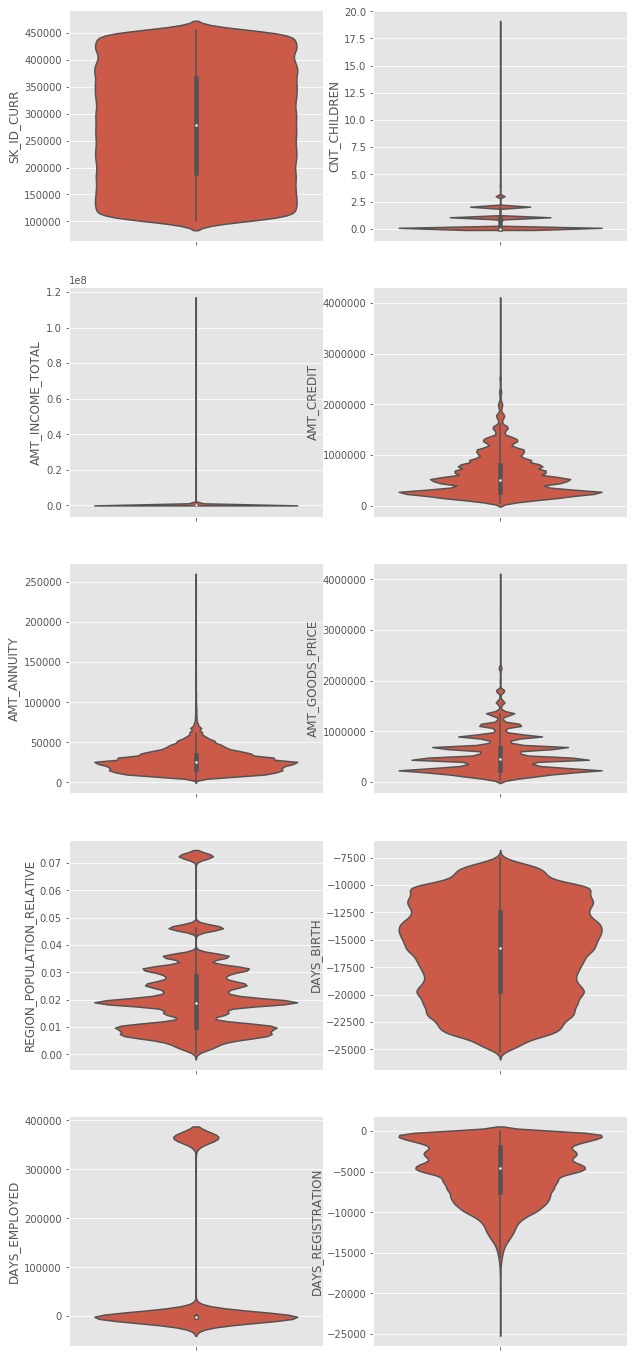

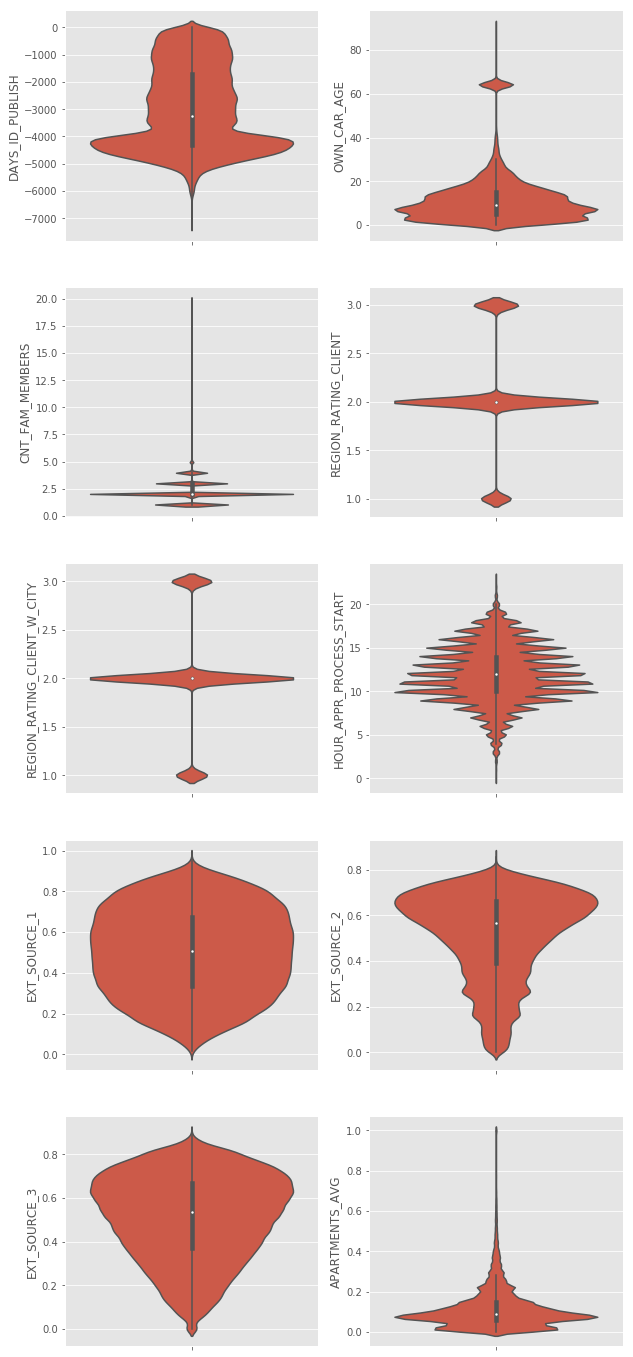

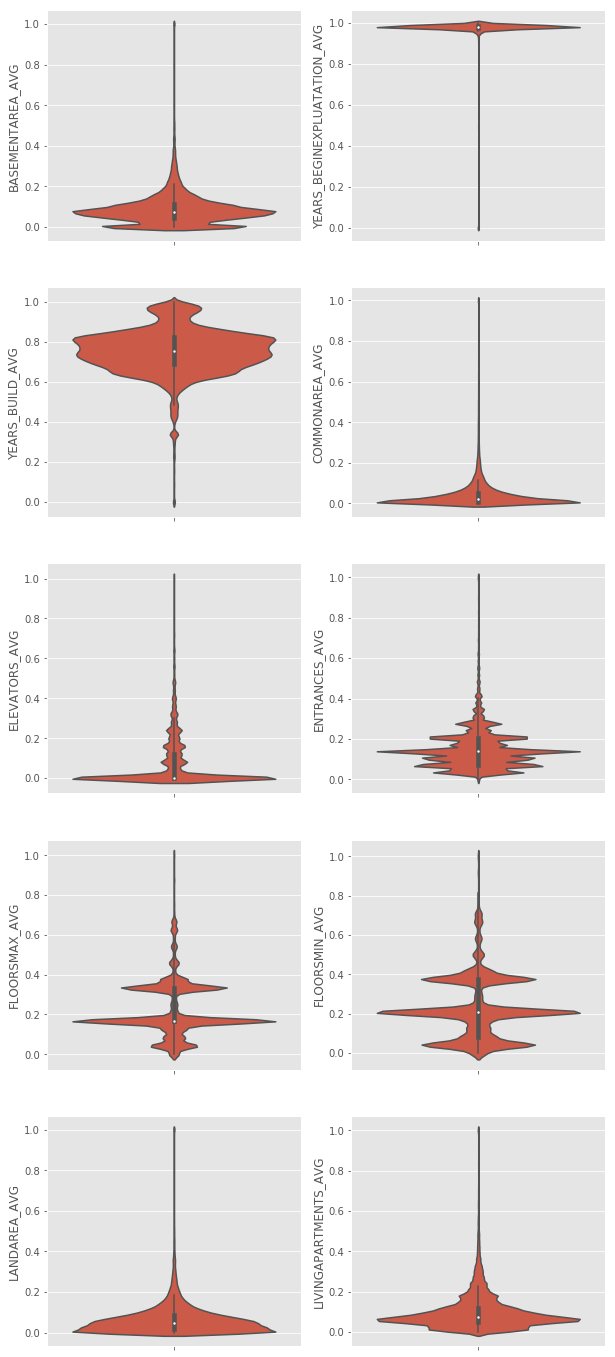

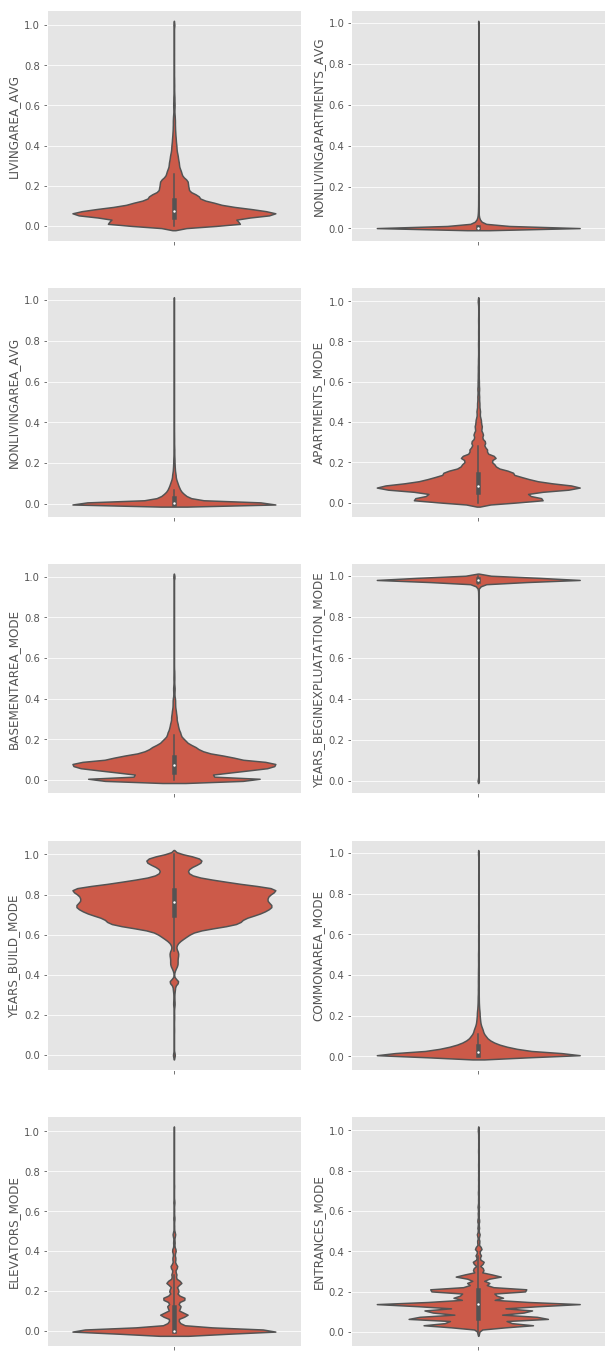

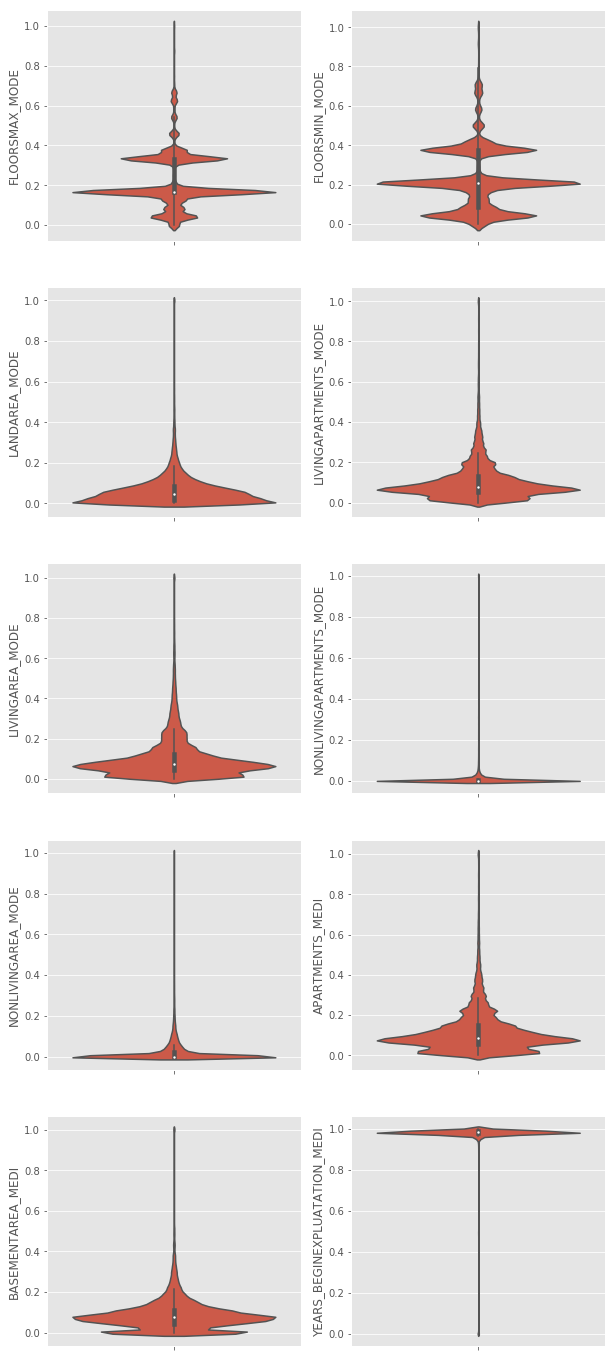

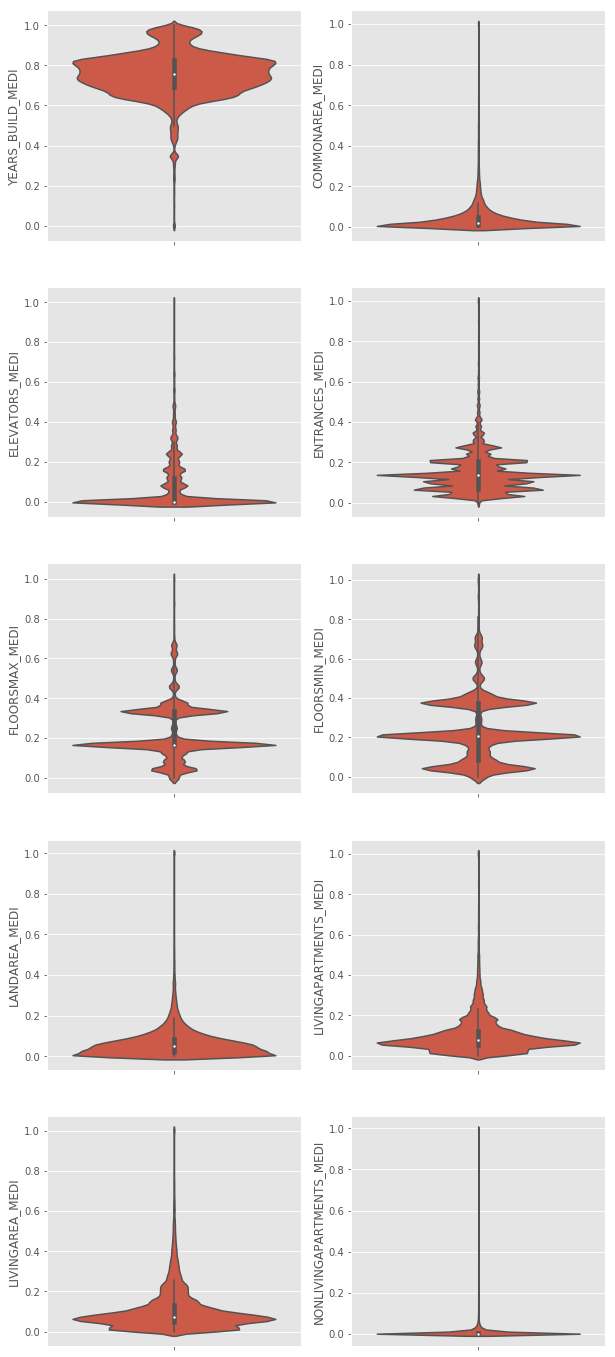

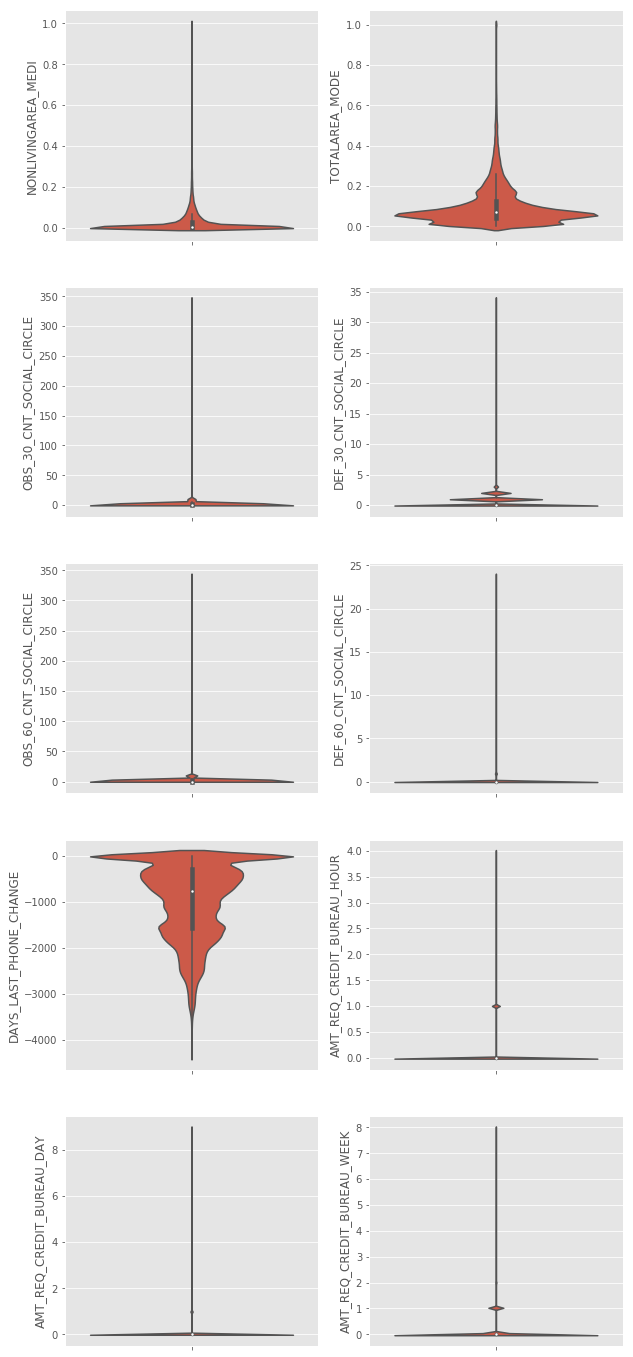

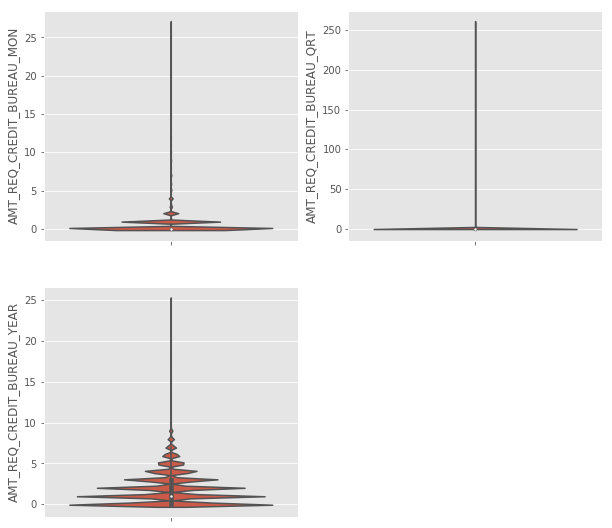

In [6]:
# 檢視這些欄位的數值範圍
s = 10
m = 2
# n = int(np.ceil(len(numeric_columns) / m))
n = s
plt.figure(figsize=(10,50))
for i in range(len(numeric_columns)):
    plt.subplot(n,m,(i%s)+1)
    sns.violinplot(y=numeric_columns[i],data=app_train)
    if (i+1)%10 == 0:
        plt.show()
        plt.figure(figsize=(10,50))
    # if i == 20:break
plt.show()


In [7]:
# 從上面的圖檢查的結果，至少這三個欄位好像有點可疑

# AMT_INCOME_TOTAL
# REGION_POPULATION_RELATIVE
# OBS_60_CNT_SOCIAL_CIRCLE


 ### Hints: Emprical Cumulative Density Plot,
 [ECDF](https://zh.wikipedia.org/wiki/%E7%BB%8F%E9%AA%8C%E5%88%86%E5%B8%83%E5%87%BD%E6%95%B0), [ECDF with Python](https://stackoverflow.com/questions/14006520/ecdf-in-python-without-step-function)
 > 直接用 numpy 做就可以了
 > [Python tutorial: Cumulative Distribution Functions](https://www.youtube.com/watch?v=ap4mfGvgDsM)

In [7]:
# 最大值離平均與中位數很遠
print(app_train['AMT_INCOME_TOTAL'].describe())


count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


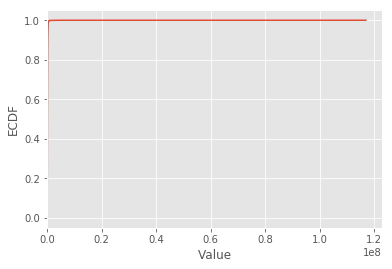

In [8]:
# 繪製 Empirical Cumulative Density Plot (ECDF)
x = np.sort(app_train['AMT_INCOME_TOTAL'])
y = np.arange(1,1+len(x)) / len(x)

plt.plot(x,y)
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.xlim([x.min(), x.max() * 1.05]) # 限制顯示圖片的範圍
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍

plt.show()


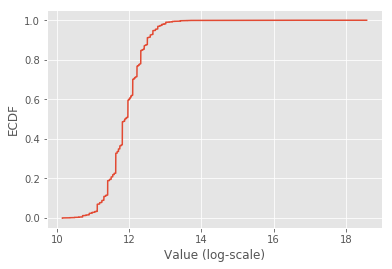

In [9]:
# 改變 y 軸的 Scale, 讓我們可以正常檢視 ECDF
plt.plot(np.log(x), y)
plt.xlabel('Value (log-scale)')
plt.ylabel('ECDF')
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()


count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64


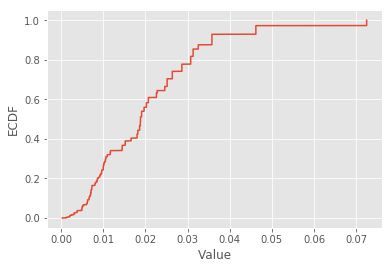

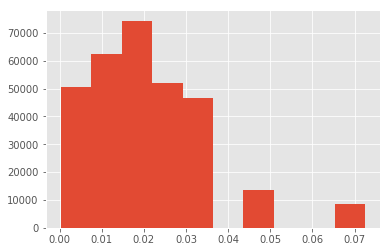

In [10]:
# 最大值落在分布之外
print(app_train['REGION_POPULATION_RELATIVE'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
x = np.sort(app_train['REGION_POPULATION_RELATIVE'])
y = np.arange(1,1+len(x)) / len(x)

plt.plot(x,y)
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()

app_train['REGION_POPULATION_RELATIVE'].hist()
plt.show()

# 這種顯示方式很難閱讀，故註解掉
# app_train['REGION_POPULATION_RELATIVE'].value_counts()

# 就以這個欄位來說，雖然有資料掉在分布以外，也不算異常，僅代表這間公司在稍微熱鬧的地區有的據點較少，
# 導致 region population relative 在少的部分較為密集，但在大的部分較為疏漏


count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64
344.0         1
47.0          1
30.0          1
29.0          2
28.0          1
27.0          5
26.0          1
25.0         11
24.0         12
23.0         13
22.0         20
21.0         28
20.0         30
19.0         44
18.0         49
17.0         73
16.0        137
15.0        166
14.0        238
13.0        401
12.0        620
11.0        837
10.0       1335
9.0        1959
8.0        2886
7.0        4344
6.0        6349
5.0        9463
4.0       13946
3.0       20215
2.0       29766
1.0       48870
0.0      164666
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64


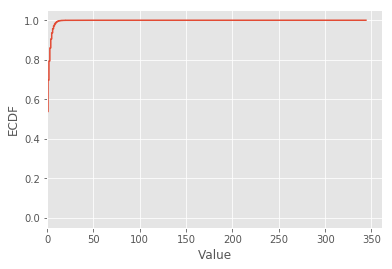

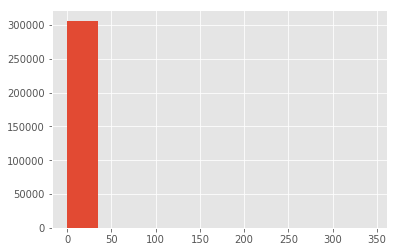

In [11]:
# 最大值落在分布之外
print(app_train['OBS_60_CNT_SOCIAL_CIRCLE'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)

x = np.sort(app_train['OBS_60_CNT_SOCIAL_CIRCLE'].dropna())
y = np.arange(1,1+len(x)) / len(x)

plt.plot(x,y)
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.xlim([x.min() * 0.95, x.max() * 1.05])
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()

app_train['OBS_60_CNT_SOCIAL_CIRCLE'].hist()
plt.show()
print(app_train['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts().sort_index(ascending = False))


 ## 注意：當 histogram 畫出上面這種圖
 (只出現一條，但是 x 軸延伸很長導致右邊有一大片空白時，代表右邊有值但是數量稀少。
 這時可以考慮用 value_counts 去找到這些數值

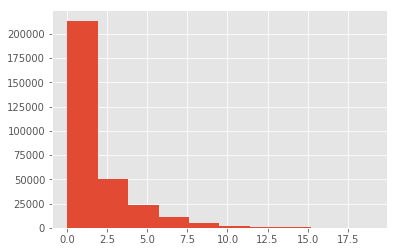

In [12]:
# 把一些極端值暫時去掉，在繪製一次 Histogram
# 選擇 OBS_60_CNT_SOCIAL_CIRCLE 小於 20 的資料點繪製
loc_a = app_train['OBS_60_CNT_SOCIAL_CIRCLE'] < 20
loc_b = 'OBS_60_CNT_SOCIAL_CIRCLE'

app_train.loc[loc_a, loc_b].hist()
plt.show()


